In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
#score method
hd = pd.read_csv("heart-disease.csv")
from sklearn.ensemble import RandomForestClassifier
#Setup random seed
np.random.seed(42)
X = hd.drop("target",axis=1)
y = hd["target"]
#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)#default 100, sayı küçülünce train score azalabilir,yükselirse test artabilir
#fit the model todata (training the ml model)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [3]:
clf.score(X_train,y_train)

1.0

In [4]:
clf.score(X_test,y_test)#ikisi yakın olmalı train ve test sonucu

0.8524590163934426

In [5]:
#score method on regression problem
#coefficient of determination : proportion of the variation in the dependent
#variable that is predictable from independent variable
from sklearn.ensemble import RandomForestRegressor
#Setup random seed
np.random.seed(42)
X = hd.drop("target",axis=1)
y = hd["target"]
#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Instantiate Random Forest Classifier
model = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)#default 100, sayı küçülünce train score azalabilir,yükselirse test artabilir


In [6]:
model.score(X_test,y_test)

0.5106393318965518

In [7]:
model.score(X_train,y_train)

0.924203269641995

In [8]:
#evaluate a model using scoring parameter
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
#Setup random seed
np.random.seed(42)
X = hd.drop("target",axis=1)
y = hd["target"]
#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)#default 100, sayı küçülünce train score azalabilir,yükselirse test artabilir
#fit the model todata (training the ml model)
clf.fit(X_train, y_train);

In [9]:
clf.score(X_test,y_test) # returns the mean accuracy on the given test data and labels
cross_val_score(clf, X, y, cv=5) #evaluate a score by cross validation cross validation = 5 folds

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [10]:
np.random.seed(42)
#single training and tets split score
clf_single_score = clf.score(X_test,y_test)
# take the mean of 5-fold cross validation score
clf_cv_score = np.mean(cross_val_score(clf,X,y,cv=5))#scoring param none default = mean accuracy
#compare
clf_single_score, clf_cv_score

(0.8524590163934426, 0.8248087431693989)

In [11]:
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

#classification model evaluation metrics that we can use in cross validation
#metrics
1. accuracy
2. area under ROC curve
3. Confusion Matrix
4. Classification report

In [12]:
#accuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = hd.drop("target", axis=1)
y = hd["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y,cv=5)

In [13]:
np.mean(cross_val_score)#heart disease classifier cross validated accuracy

0.8116939890710382

In [14]:
# area under ROC curve (AUC)
# create test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
# a roc curve are comparison of a model'S true positive rate versus a model's false positive rate
# false positive = predict 1 truth 0
# false negative = predict 0 truth 1
from sklearn.metrics import roc_curve
#fit classifier
clf.fit(X_train,y_train)
# make preds with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]# left probability of label is 0, right label is 1

array([[0.04, 0.96],
       [0.65, 0.35],
       [0.17, 0.83],
       [0.99, 0.01],
       [0.19, 0.81],
       [0.16, 0.84],
       [0.51, 0.49],
       [0.92, 0.08],
       [0.44, 0.56],
       [0.25, 0.75]])

In [15]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.96, 0.35, 0.83, 0.01, 0.81, 0.84, 0.49, 0.08, 0.56, 0.75])

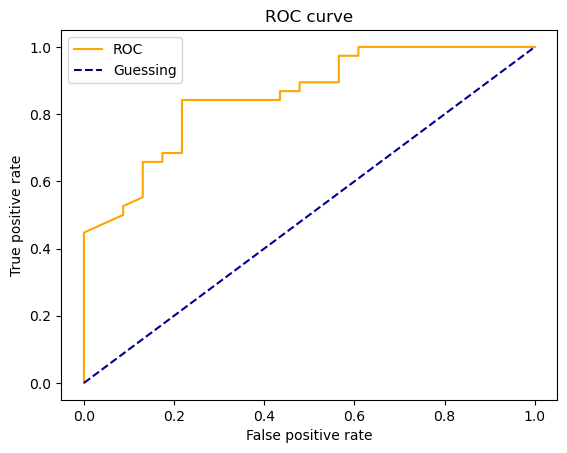

In [16]:
# calc fpr,tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
#check fp with visualize (create a func for plotting roc curves)
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
    plots a roc curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    #plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    #plot baseline(no predict)
    plt.plot([0,1],[0,1],color="darkblue", linestyle="--",label="Guessing")
    
    # customize plot
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [17]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive) #area under curve (mavi çizgiyi kaale alma) 

0.8552631578947368

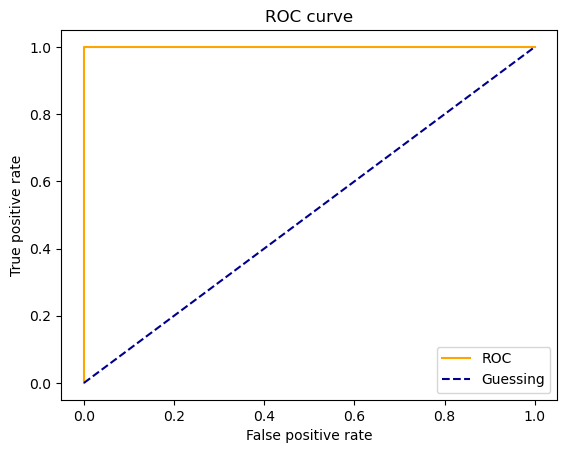

In [18]:
# plot perfect roc curve
fpr, tpr, thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [19]:
#perfect auc score
roc_auc_score(y_test,y_test)

1.0

In [20]:
# confusion matrix
from sklearn.metrics import confusion_matrix

y_preds =clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[18,  5],
       [ 7, 31]], dtype=int64)

In [21]:
#visualize 
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,18,5
1,7,31


In [22]:
#yeni paket yüklemek için cmd den env activate et yine sonra bu şekilde ekle
import sys
!conda install --yes --prefix {sys.prefix} seaborn



Solving environment: ...working... done

# All requested packages already installed.



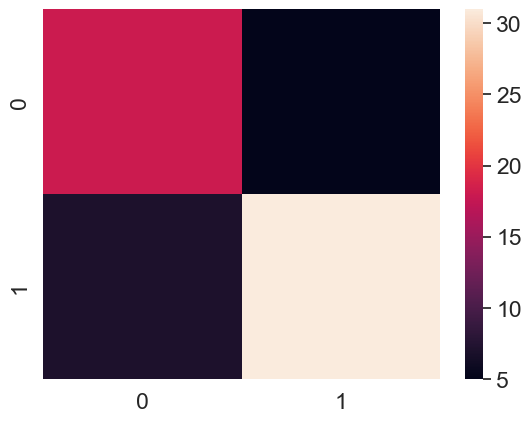

In [23]:
# seaborn heatmap (viz conf matrix) = plot rectangular data as a color encoded matrix viz library
import seaborn as sns
#set font scale
sns.set(font_scale= 1.5)
#create conf mat
conf_mat = confusion_matrix(y_test,y_preds)
#plot it
sns.heatmap(conf_mat);


In [24]:
#version check son update için cmd -> env activate -> pip install -U scikit-learn
import sklearn
sklearn.__version__

'1.2.0'

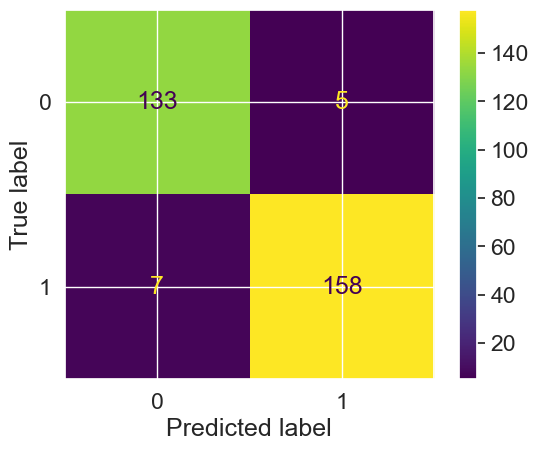

In [25]:
# sklearn matrix oluşturma
from sklearn.metrics import ConfusionMatrixDisplay as cmd
cmd.from_estimator(estimator=clf,X=X,y=y);#makes the predictions for you

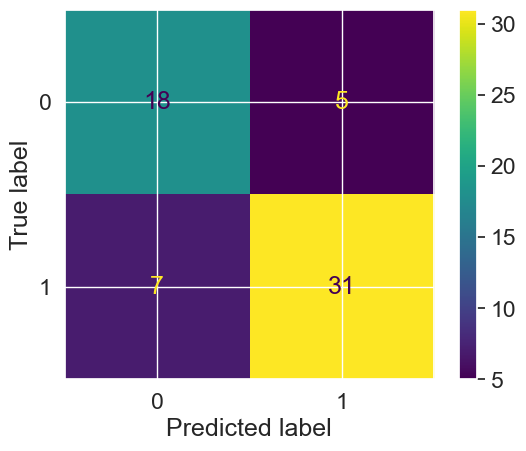

In [26]:
cmd.from_predictions(y_true=y_test,y_pred=y_preds);#predler önceden oluşturulmalı
#; oluşturduğu nesnenin açıklamasını print etmez

In [27]:
#classification report
from sklearn.metrics import classification_report as c_report
print(c_report(y_test,y_preds))#if class imbalances -> macro avg ang weighted avg(majority class) 

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        23
           1       0.86      0.82      0.84        38

    accuracy                           0.80        61
   macro avg       0.79      0.80      0.79        61
weighted avg       0.81      0.80      0.80        61



In [28]:
# where precision and recall become valuable
# 10000 of patient 1 get heart disease
disease_true = np.zeros(10000)
disease_true[0] = 1
disease_preds = np.zeros(10000)#all preds are 0
pd.DataFrame(c_report(disease_true,disease_preds,output_dict=True))
# is the model stil useful according to accuracy?
# 

C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


# regression model evaluation metrics
1- r squared(coefficient)
2- mean absolute error
3- mean squared error

In [29]:
#get data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing;
#turn into df (its dict now)
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [30]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor()

In [31]:
model.score(X_test,y_test)

0.8065734772187598

In [32]:
y_test.mean()

2.0550030959302323

In [33]:
from sklearn.metrics import r2_score

#fill array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())


In [34]:
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [35]:
#r2_score() shift tab bilgi verir : Array-like value defines weights used to average scores
#to evaluate the performance of a linear regression model. 
# compares your models predictions to the mean of the targets
# perfect predicts = 1
# model predict the mean = 0
#It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s)
r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

## mean absolute error
MAE is the average of the absolute differences between predictions and actuals
<br>
how wrong your model predicts are

In [36]:
#mae
from sklearn.metrics import mean_absolute_error
y_preds= model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.32659871732073664

In [37]:
df =pd.DataFrame(data={"actual values":y_test,"predicted values":y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [38]:
# mae formula
np.abs(df["differences"]).mean()

0.32659871732073664

**MSE mean squared error**

mean of the square of errors between actual and predicted values

In [39]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.2534678520824551

In [40]:
df["squared differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [41]:
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

**Which one should you use**

r square is similar to accuracy: closer 1 better model, but it doesnt tell how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average

MSE amplifies larger differences

when being 10 000 dolar off is twice as bad as being 5 000 dolar off -> more attention to MAE

when being 10 000 dolar off is more than twice as bad as being 5 000 dolar off -> more attention to MSE

**Classification Model Evaluation Metrics/Techniques**

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).



### using scoring parameter

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= hd.drop("target",axis=1)
y = hd["target"]

clf= RandomForestClassifier(n_estimators=100)


In [43]:
np.random.seed(42)
#crosscal accuracy
cv_acc= cross_val_score(clf,X,y,cv=5,scoring=None) #if scoring=none, estimator's default scoring evaluation metric is used (accuracy for classification)
cv_acc
#cv default 5

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [44]:
# cross validated accuracy
print(f"cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

cross validated accuracy is: 82.48%


In [45]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")

In [46]:
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

## which classification metric you should use


**accuracy=** is a good measure to start with if all classes are balanced

**precision and recall** become mor important when classes are imbalanced.

FP predictions are worse than FN, aim for higher precision (FP tahminleri FN'den daha kötüyse, daha yüksek kesinlik hedefleyin)

A model which produces no false positives has a precision of 1.0

FN preds are worse than FP, a,m for higher recall.

A model which produces no false negatives has recall of 1.0

**F1** is a combination of precision and recall.

In [47]:
#cross validated precision
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [48]:
#recall
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

## lets see scoring parameter being use for regression problem

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= housing_df.drop("target",axis=1)
y= housing_df["target"]

model= RandomForestRegressor(n_estimators = 100)

In [50]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X,y,cv=3,scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [51]:
#mean squared error
cv_mse = cross_val_score(model,X,y,scoring="neg_mean_squared_error")# higher value better than lower value because it is negative
np.mean(cv_mse)

-0.4303784827892982

In [52]:
#mean absolute error
cv_mae = cross_val_score(model,X,y,scoring="neg_mean_absolute_error")# higher value better than lower value
np.mean(cv_mae)

-0.46680736586240323

## Using different evaluation metrics as scikitlearn functions


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
#create x and y
X = hd.drop("target",axis=1)
y=hd["target"]
#split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
#create model
clf = RandomForestClassifier()
#fit model
clf.fit(X_train,y_train)
#make predictions
y_preds= clf.predict(X_test)
#evaluate model (compare our preds with real data)
print("Classifier metrics on test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Presicion: {precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1: {f1_score(y_test,y_preds)}")

Classifier metrics on test set
Accuracy: 85.25%
Presicion: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [54]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
#create x and y
X = housing_df.drop("target",axis=1)
y=housing_df["target"]
#split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
#create model
model = RandomForestRegressor()
#fit model
model.fit(X_train,y_train)
#make predictions
y_preds= model.predict(X_test)
#evaluate model (compare our preds with real data)
print("Regression metrics on test set")
print(f"R2 score: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

Regression metrics on test set
R2 score: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


In [55]:
# difference from cross val: last metrics are found on one train test split vs (cross val)metrics are found on multiple train test split
# take longer to find because train multiple models and evaluate them(cross val) better than last ones on outside.

## Improve model

First preds = baseline preds
First model = baseline model
### data perspective
* More data more learning/better
* Improve data/more features and sample
### model perspective
* better model?
* improve current model?

**can we improve hyperparameters of this model for this**
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model yo can adjust(ayarlamak) to improve its ability to find patterns

In [56]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [57]:
clf.get_params()#baseline params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3 ways to adjust hyperparameters
* by hand
* randomly (randomsearchcv)
* exhaustively (gridSearchCv)

## Tuning hyperparameters by hand
**split data as train/70, validation(hyperparameters get tuned on these)/15, test(model get evaluated)/15**

* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators


In [61]:
#140
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels on a classification
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict = {"accuracy": round(accuracy,2),#2 decimal places
                  "precision": round(precision,2),
                  "recal":round(recall,2),
                  "f1":round(f1,2)}
    
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metric_dict
    

In [62]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

#shuffle(karıştır) data
hd_shuffled = hd.sample(frac=1)#sample is pandas func & frac = 1 = 100% of data

#Split into X and y
X = hd_shuffled.drop("target",axis=1)
y = hd_shuffled["target"]

#train,val,test
train_split = round(0.7 * len(hd_shuffled)) # 70%
valid_split = round(train_split + 0.15 * len(hd_shuffled))
X_train,y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]

len(X_train),len(X_valid),len(X_test)

C:\Users\CASPER\AppData\Local\Temp\ipykernel_10212\742663269.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_train,y_train = X[:train_split], y[:train_split]
C:\Users\CASPER\AppData\Local\Temp\ipykernel_10212\742663269.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
C:\Users\CASPER\AppData\Local\Temp\ipykernel_10212\742663269.py:16: FutureWarning: The behavior of `series[i:j]` with an integer-dt

(212, 45, 46)

In [63]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
#make pred
y_preds = clf.predict(X_valid)

#evaluate classifier on validation set
baseline_metrics= evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recal': 0.88, 'f1': 0.85}

In [64]:
#n_estimators
np.random.seed(42)
#create a second classifier with diff hyp
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)
#make pred
y_preds_2 = clf_2.predict(X_valid)

#evaluate 2nd classifier on validation set
clf_2_metrics= evaluate_preds(y_valid,y_preds_2)


Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


In [67]:
#randomized search cv
from sklearn.model_selection import RandomizedSearchCV

grid= {"n_estimators":[10,100,200,500,1000,1200],
      "max_depth":[None,5,10,20,30],
      "max_features":["auto","sqrt"],
      "min_samples_split": [2,4,6],
      "min_samples_leaf":[1,2,4]}

np.random.seed(42)

#split

X= hd_shuffled.drop("target",axis=1)
y= hd["target"]

#split into train test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate Random forest class
clf = RandomForestClassifier(n_jobs=1)
#n_jobs : integer, optional (default=1) The number of jobs to run in parallel for both fit and predict. 
#If -1, then the number of jobs is set to the number of cores.
#Training the Random Forest model with more than one core is obviously more performant than on a single core

# setup randomizedsearch CV (CV=cross validation so we just split train and test/automacly make validation for us)

rs_clf = RandomizedSearchCV(estimator=clf,param_distributions=grid,n_iter=10,#number of models to try
                           cv=5,verbose=2)
# 10 different combination random choose hypparams value

# fit
rs_clf.fit(X_train,y_train);#fit 50 different times
#which combination of these hyperparams is best up to ten different model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples

C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, ma

C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.3s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.3s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.4s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.0s


In [68]:
rs_clf.best_params_#show us best results combination, RAndomizedSearchCv has founded for us

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [69]:
# make pred with best hypparams
rs_y_preds = rs_clf.predict(X_test)
#evaluate
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Acc: 50.82%
Precision: 0.53
Recall: 0.66
F1: 0.58


Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85
    
    AND
    
Acc: 50.82%
Precision: 0.53
Recall: 0.66
F1: 0.58

n_iter artırarak daha fazla kombinasyon denenir ve daha iyi sonuç alınabilecek model bulunur.

## GridSearchCV
 **trying every single combination is waste of time on grid**

In [70]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [73]:
grid_2 = {'n_estimators': [10, 100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}#reduce our search space


In [74]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

#split

X= hd_shuffled.drop("target",axis=1)
y= hd["target"]

#split into train test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate Random forest class
clf = RandomForestClassifier(n_jobs=1)
#n_jobs : integer, optional (default=1) The number of jobs to run in parallel for both fit and predict. 
#If -1, then the number of jobs is set to the number of cores.
#Training the Random Forest model with more than one core is obviously more performant than on a single core

# setup GridSearch CV (CV=cross validation so we just split train and test/automacly make validation for us)

gs_clf = GridSearchCV(estimator=clf,param_grid=grid_2,cv=5,verbose=2)#no iter_n because it will be search every combination

# fit
gs_clf.fit(X_train,y_train);
#which combination of these hyperparams is best up to ten different model

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.8s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.8s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.8s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.8s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s


C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_

C:\Users\CASPER\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [75]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [76]:
gs_y_preds = gs_clf.predict(X_test)
#evaluate
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc: 45.90%
Precision: 0.49
Recall: 0.62
F1: 0.55


# compare our different models metrics

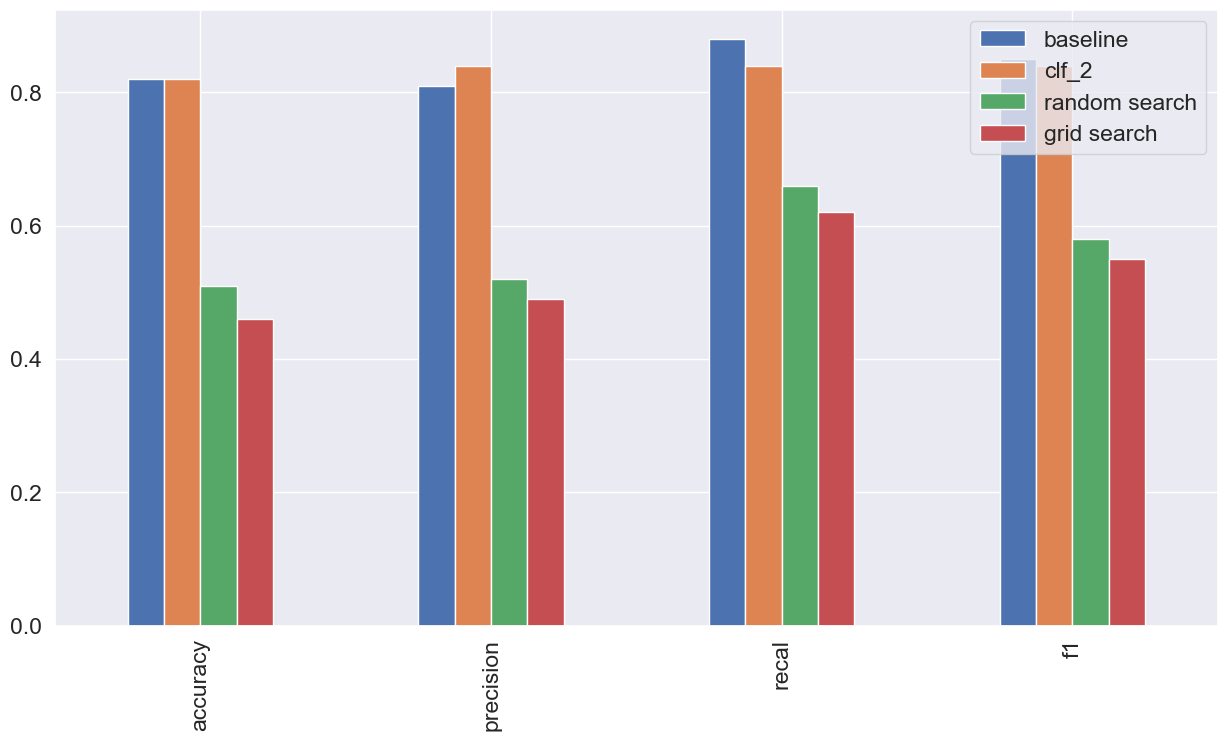

In [85]:

compare_met = pd.DataFrame({"baseline":baseline_metrics,
                           "clf_2":clf_2_metrics,
                           "random search":rs_metrics,
                           "grid search": gs_metrics})

compare_met.plot.bar(figsize=(15,8));

# Save and load model

* with python's pickle module
* with joblib module

### Notes
* Correlation between columns effects model
* Forward/backward attribute selection : backward mean train the model on all attributes and then slowly start taking away attributes/columns to train your model. forward is opposite : keep adding one attribute one at a time until you get the accuracy top? if you keep increasing columns all the other attributes dont improve the model may not needed.

In [86]:
# Pickle
# Import
import pickle
# save an extisting model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl","wb"))#pkl=pickle file / wb=write binary

In [89]:
# load a saved model
loaded_pickle = pickle.load(open("gs_random_forest_model_1.pkl","rb"))#rb read binary
#split data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#make preds
pickle_y_preds = loaded_pickle.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Acc: 85.25%
Precision: 0.81
Recall: 0.90
F1: 0.85


{'accuracy': 0.85, 'precision': 0.81, 'recal': 0.9, 'f1': 0.85}

In [91]:
#Joblib
from joblib import dump, load

#save model
dump(gs_clf,filename="gs_random_forest_model.joblib");

In [92]:
#load model
loaded_job_model = load(filename="gs_random_forest_model.joblib")

In [94]:
#preds
job_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test,job_y_preds) # same as pickle results / model is large = joblib better

Acc: 85.25%
Precision: 0.81
Recall: 0.90
F1: 0.85


{'accuracy': 0.85, 'precision': 0.81, 'recal': 0.9, 'f1': 0.85}